In [ ]:
#https://www.kaggle.com/rtatman/188-million-us-wildfires

In [26]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
df = pd.read_csv("./data_ML/incendi_liguria.csv")
dfplot = df



pd.__version__
mapping = {"LA SPEZIA": 1, "GENOVA": 2, "SAVONA": 3, "IMPERIA": 4}
df = df.replace({"provincia": mapping})

/home/andrea/miniconda3/envs/myprop/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


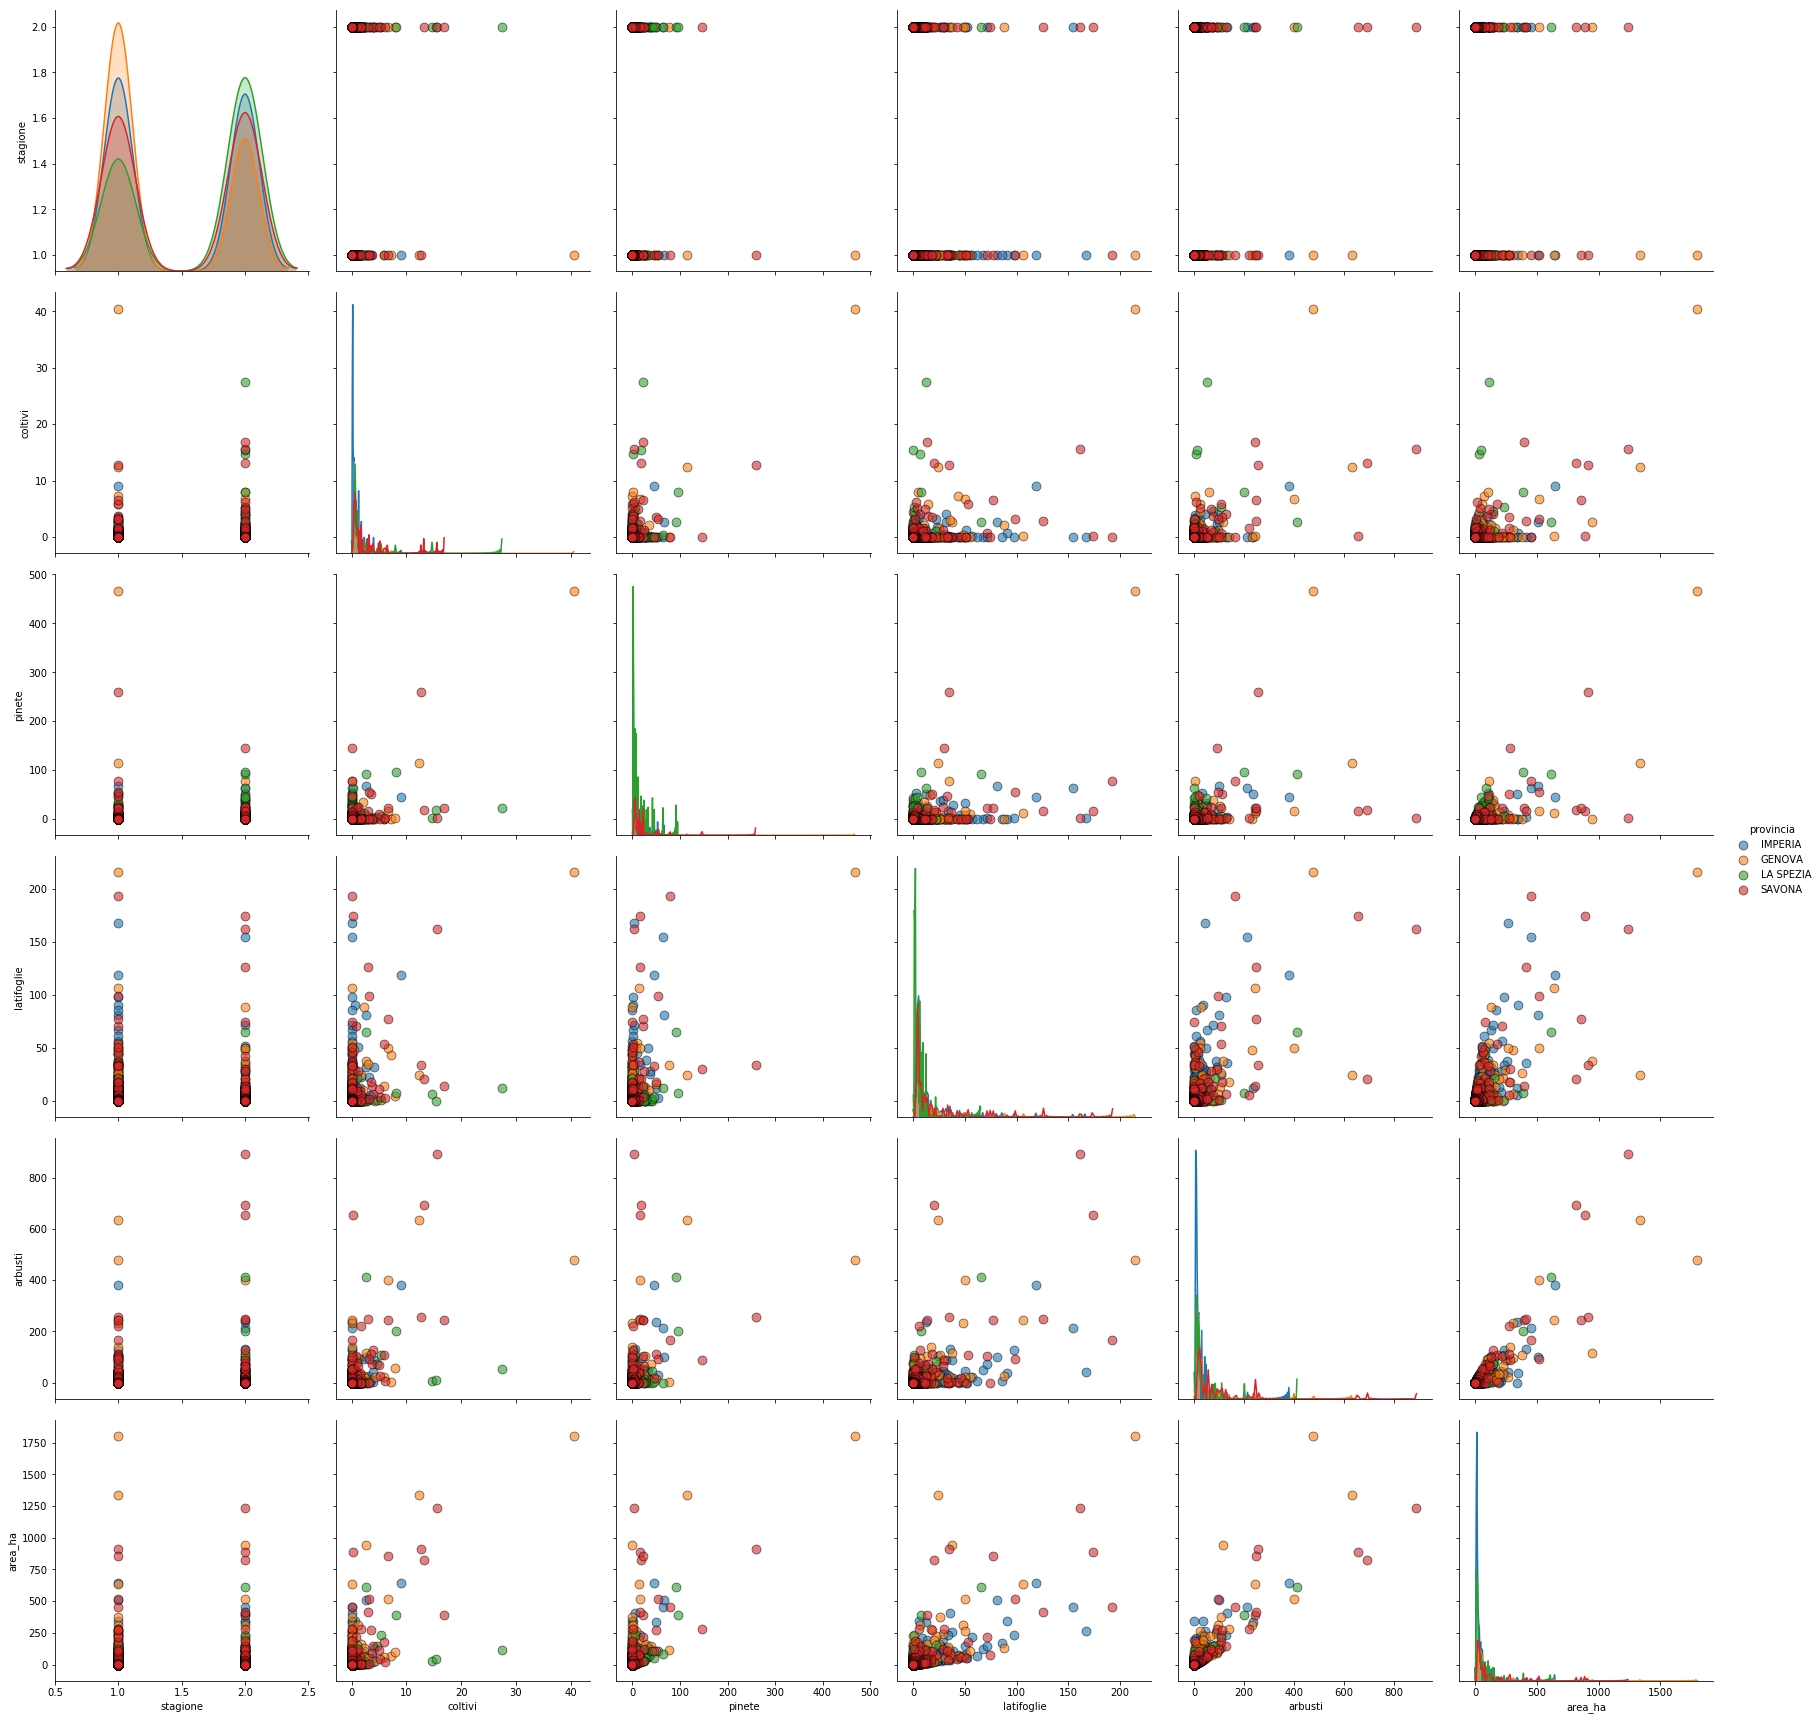

In [2]:
import seaborn as sns# Create the default pairplot
visual_labels = ['stagione', "coltivi",  'pinete', 'latifoglie', 'arbusti', "provincia", 'area_ha']
sns.pairplot(dfplot[visual_labels], hue = "provincia",
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)
 #diag_kind = 'kde',
# for more info take a  look at https://seaborn.pydata.org/generated/seaborn.pairplot.html    
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5964 entries, 0 to 5963
Data columns (total 17 columns):
giorno        5964 non-null int64
mese          5964 non-null int64
anno          5964 non-null int64
stagione      5964 non-null int64
data          5964 non-null object
area_ha       5964 non-null float64
non_veg       5964 non-null float64
coltivi       5964 non-null float64
prati         5964 non-null float64
oliveti       5964 non-null float64
pinete        5964 non-null float64
latifoglie    5964 non-null float64
castagneti    5964 non-null float64
arbusti       5964 non-null float64
altro         5964 non-null float64
provincia     5964 non-null int64
comune        5964 non-null object
dtypes: float64(10), int64(5), object(2)
memory usage: 792.2+ KB


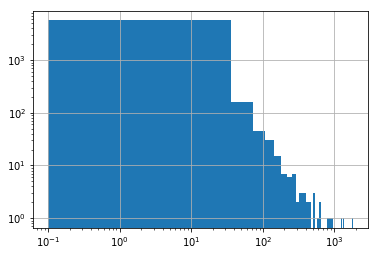

In [3]:
df.info()
df = df.drop(["comune",  "giorno", "mese","anno", "data"], axis = 1)
fig, ax = plt.subplots()

df["area_ha"].hist(ax=ax, bins = 50)
ax.set_yscale('log')
ax.set_xscale("log")

In [4]:
#df.info()
#df["castagneti"].mean()
#df.values
list(df.columns)

['stagione',
 'area_ha',
 'non_veg',
 'coltivi',
 'prati',
 'oliveti',
 'pinete',
 'latifoglie',
 'castagneti',
 'arbusti',
 'altro',
 'provincia']

In [5]:
#df['area_ha'] > 10
data2 =  pd.DataFrame({"isbig": df['area_ha'] > 8})
df  =  df.drop(["area_ha"], axis=1)
df = df.join(data2)

df.columns

Index(['stagione', 'non_veg', 'coltivi', 'prati', 'oliveti', 'pinete',
       'latifoglie', 'castagneti', 'arbusti', 'altro', 'provincia', 'isbig'],
      dtype='object')

In [7]:
th = 0.3
df[df.columns[1:10]] = df[df.columns[1:10 ]] > th 
df.head()

stagione  non_veg  coltivi  prati  oliveti  pinete  latifoglie  castagneti  \
0         1    False    False  False    False   False       False        True   
1         1    False    False  False    False   False       False       False   
2         1    False    False  False     True   False       False       False   
3         1    False    False  False    False   False       False        True   
4         1    False    False  False    False   False       False        True   

   arbusti  altro  provincia  isbig  
0     True  False          4  False  
1     True  False          4  False  
2     True  False          4  False  
3    False  False          2  False  
4    False  False          2  False

In [8]:
df.astype({'isbig': 'int32'}).dtypes
df.head()

stagione  non_veg  coltivi  prati  oliveti  pinete  latifoglie  castagneti  \
0         1    False    False  False    False   False       False        True   
1         1    False    False  False    False   False       False       False   
2         1    False    False  False     True   False       False       False   
3         1    False    False  False    False   False       False        True   
4         1    False    False  False    False   False       False        True   

   arbusti  altro  provincia  isbig  
0     True  False          4  False  
1     True  False          4  False  
2     True  False          4  False  
3    False  False          2  False  
4    False  False          2  False

Decision tree has 547 nodes with maximum depth 13.


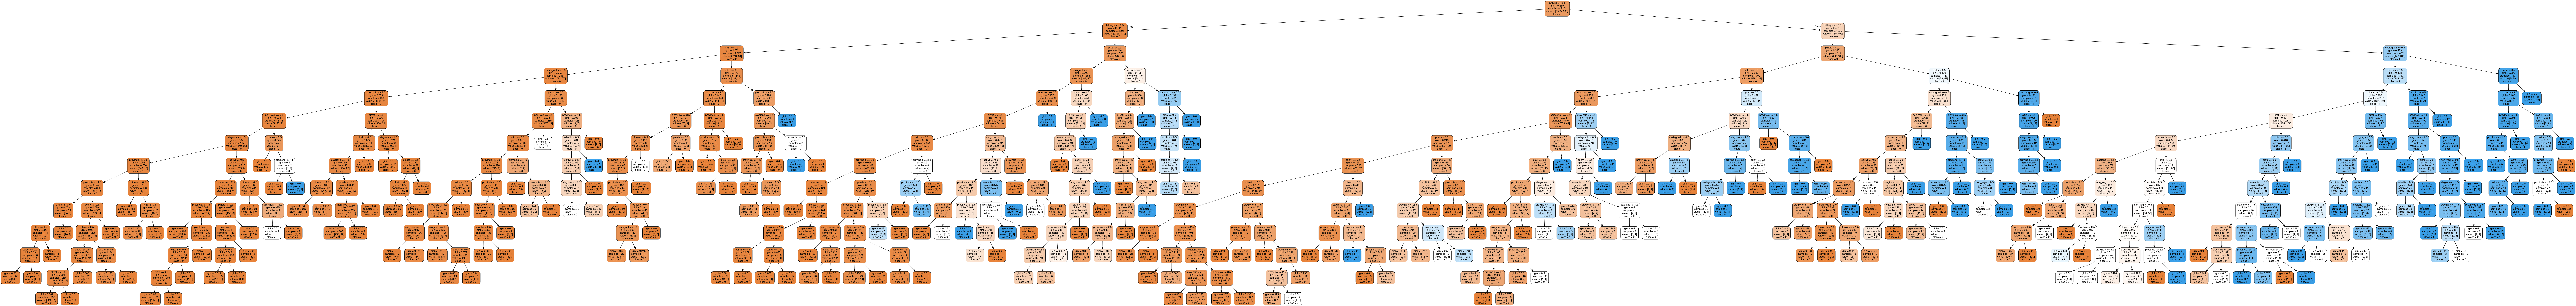

In [9]:
from sklearn.tree import DecisionTreeClassifier
RSEED  = 500
tree = DecisionTreeClassifier(random_state=RSEED)
features = list(df.columns[:-1])
features


from sklearn.model_selection import train_test_split

# Extract the labels
labels = np.array(df.pop('isbig'))

# 30% examples in test data
train, test, train_labels, test_labels = train_test_split(df, labels, 
                                                          stratify = labels,
                                                          test_size = 0.3, 
                                                          random_state = RSEED)





#y = df["isbig"]
#X = df[features]

tree.fit(train,train_labels)

print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.')

from sklearn.tree import export_graphviz

# Export as dot
export_graphviz(tree, 'tree.dot', rounded = True, 
                feature_names = features, 
                class_names = ['0', '1'], filled = True)

from subprocess import call
# Convert to png
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=100']);



from IPython.display import Image
Image('tree.png')


In [11]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['precision'] = precision_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(test_labels, predictions)
    results['precision'] = precision_score(test_labels, predictions)
    results['roc'] = roc_auc_score(test_labels, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(train_labels, train_predictions)
    train_results['precision'] = precision_score(train_labels, train_predictions)
    train_results['roc'] = roc_auc_score(train_labels, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
    model_fpr, model_tpr, _ = roc_curve(test_labels, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');

In [12]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve




In [13]:
# Make probability predictions
train_probs = tree.predict_proba(train)[:, 1]
probs = tree.predict_proba(test)[:, 1]

train_predictions = tree.predict(train)
predictions = tree.predict(test)


from collections import Counter
print(Counter(probs))
print(Counter(predictions))

print(f'Train ROC AUC Score: {roc_auc_score(train_labels, train_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(test_labels, probs)}')



Counter({0.0: 361, 1.0: 131, 0.04680851063829787: 128, 0.03908794788273615: 119, 0.056: 101, 0.010050251256281407: 81, 0.07142857142857142: 74, 0.022222222222222223: 70, 0.08527131782945736: 62, 0.5: 55, 0.0594059405940594: 41, 0.03389830508474576: 36, 0.030927835051546393: 34, 0.12903225806451613: 31, 0.058823529411764705: 29, 0.041666666666666664: 26, 0.015384615384615385: 24, 0.24: 23, 0.05660377358490566: 22, 0.017857142857142856: 19, 0.0196078431372549: 19, 0.10344827586206896: 18, 0.3333333333333333: 17, 0.48148148148148145: 13, 0.034482758620689655: 13, 0.2: 12, 0.23076923076923078: 12, 0.75: 11, 0.08333333333333333: 11, 0.09090909090909091: 11, 0.3: 11, 0.03125: 11, 0.06896551724137931: 11, 0.21621621621621623: 11, 0.18181818181818182: 10, 0.3181818181818182: 9, 0.42857142857142855: 9, 0.15384615384615385: 9, 0.6666666666666666: 9, 0.14285714285714285: 8, 0.5333333333333333: 7, 0.38095238095238093: 7, 0.25: 7, 0.29411764705882354: 6, 0.38461538461538464: 6, 0.16666666666666666:

Recall Baseline: 1.0 Test: 0.48 Train: 0.54
Precision Baseline: 0.16 Test: 0.76 Train: 0.91
Roc Baseline: 0.5 Test: 0.85 Train: 0.93


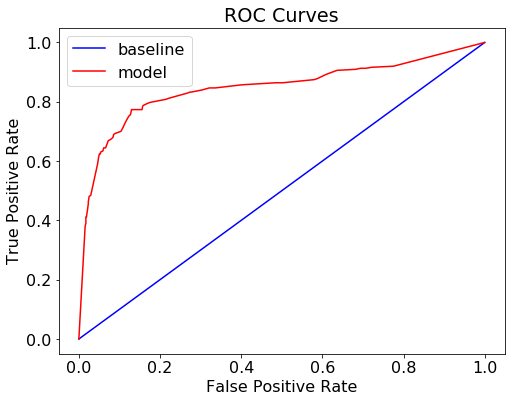

In [14]:
evaluate_model(predictions, probs, train_predictions, train_probs)

In [15]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)


Confusion matrix, without normalization
[[1459   44]
 [ 148  139]]


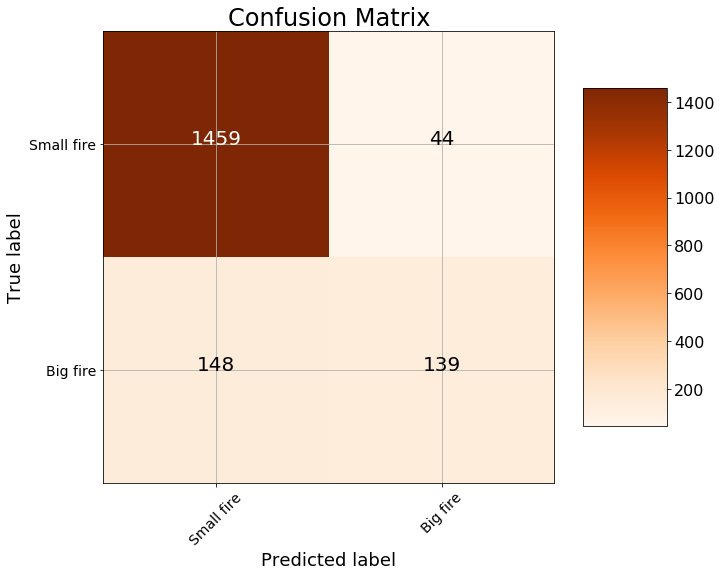

In [16]:
cm = confusion_matrix(test_labels, predictions)
plot_confusion_matrix(cm, classes = ['Small fire', 'Big fire'],
                      title = 'Confusion Matrix')

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

# Fit on training data
model.fit(train, train_labels)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=500, verbose=1,
                       warm_start=False)

Average number of nodes 473
Average maximum depth 13


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


Recall Baseline: 1.0 Test: 0.56 Train: 0.6
Precision Baseline: 0.16 Test: 0.75 Train: 0.84
Roc Baseline: 0.5 Test: 0.88 Train: 0.93


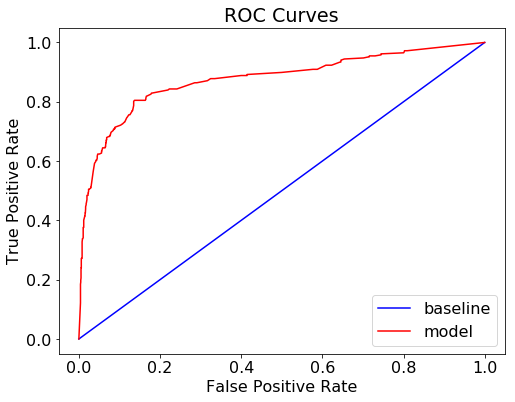

In [18]:
n_nodes = []
max_depths = []

for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')




train_rf_predictions = model.predict(train)
train_rf_probs = model.predict_proba(train)[:, 1]

rf_predictions = model.predict(test)
rf_probs = model.predict_proba(test)[:, 1]

evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)


Confusion matrix, without normalization
[[1450   53]
 [ 125  162]]


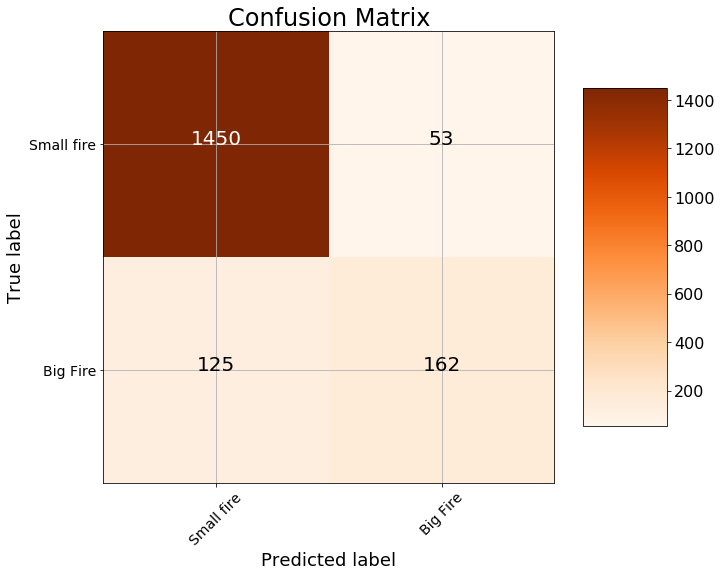

In [19]:
cm = confusion_matrix(test_labels, rf_predictions)
plot_confusion_matrix(cm, classes = ['Small fire', 'Big Fire'],
                      title = 'Confusion Matrix')



In [20]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = RSEED)

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'roc_auc', cv = 3, 
                        n_iter = 10, verbose = 1, random_state=RSEED)

# Fit 
rs.fit(train, train_labels)



Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    4.8s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [21]:
rs.best_params_
best_model = rs.best_estimator_
train_rf_predictions = best_model.predict(train)
train_rf_probs = best_model.predict_proba(train)[:, 1]

rf_predictions = best_model.predict(test)
rf_probs = best_model.predict_proba(test)[:, 1]




Confusion matrix, without normalization
[[1483   20]
 [ 154  133]]


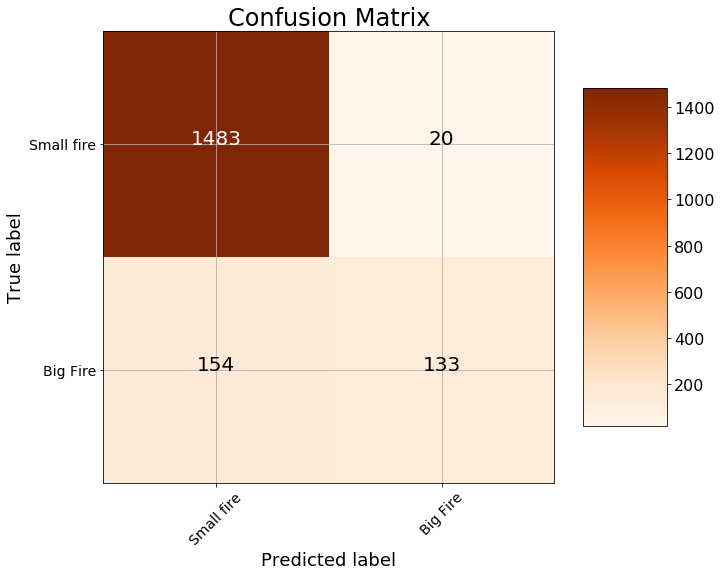

In [22]:
cm = confusion_matrix(test_labels, rf_predictions)
plot_confusion_matrix(cm, classes = ['Small fire', 'Big Fire'],
                      title = 'Confusion Matrix')


In [23]:
n_nodes = []
max_depths = []

for ind_tree in best_model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')



Average number of nodes 33
Average maximum depth 7


Recall Baseline: 1.0 Test: 0.46 Train: 0.42
Precision Baseline: 0.16 Test: 0.87 Train: 0.88
Roc Baseline: 0.5 Test: 0.9 Train: 0.89


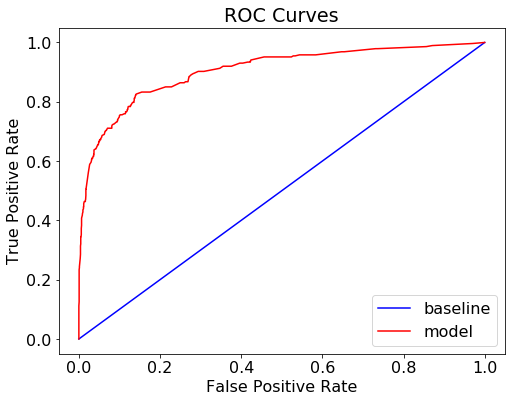

In [58]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)


In [24]:
estimator = best_model.estimators_[1]

# Export a tree from the forest
export_graphviz(estimator, 'tree_from_optimized_forest.dot', rounded = True, 
                feature_names=train.columns, max_depth = 8, 
                class_names = ['small_fires', 'big_fires'], filled = True)

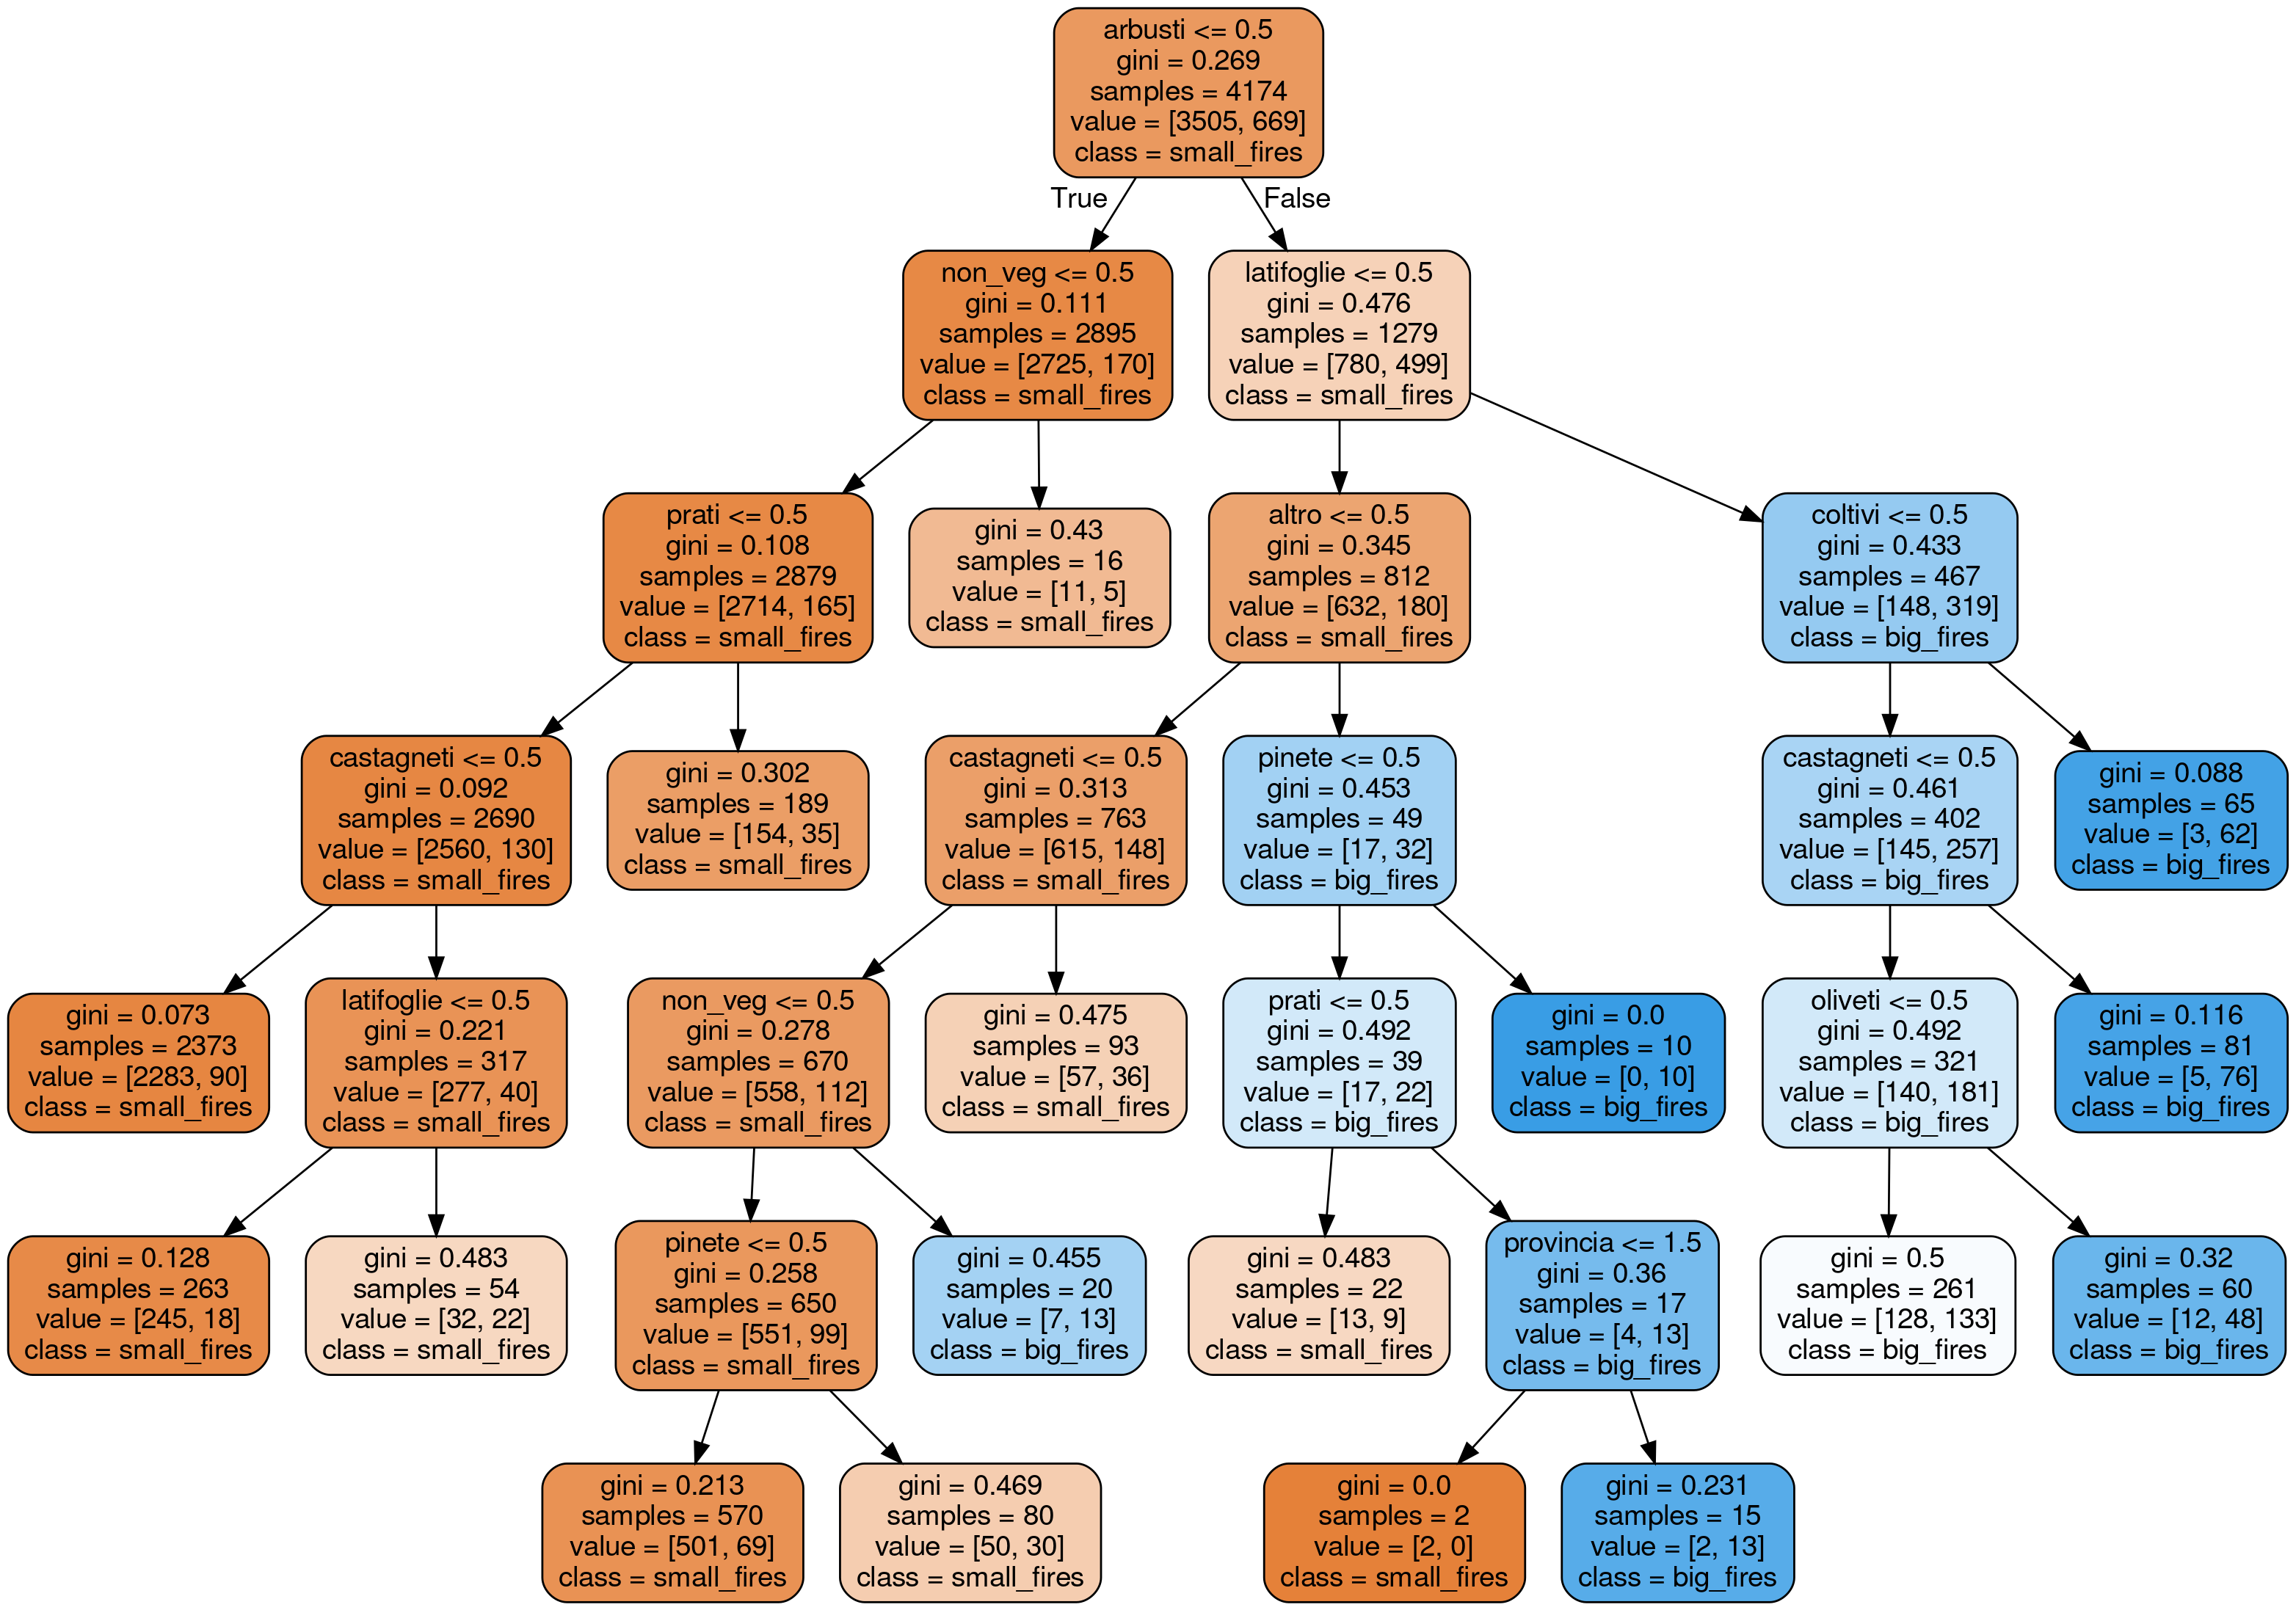

In [25]:
call(['dot', '-Tpng', 'tree_from_optimized_forest.dot', '-o', 'tree_from_optimized_forest.png', '-Gdpi=200'])
Image('tree_from_optimized_forest.png')